In [16]:
import sys
sys.path.append('../')
from _imports import *

In [17]:
raw_features = pd.read_csv('../data/fix/train_X.csv').columns.tolist()
features = pd.read_csv('../data/preprocess/train_X.csv').columns.tolist()

train_X = pd.read_csv('../data/preprocess/train_X.csv').to_numpy()
train_y = pd.read_csv('../data/preprocess/train_y.csv').iloc[:, 0].to_numpy()
test_X = pd.read_csv('../data/preprocess/test_X.csv').to_numpy()

In [18]:
def base_feature(f: str) -> str:
    if "_" in f:
        return f[:f.index("_")]
    else:
        return f

In [19]:
m = RandomForestRegressor(
  n_estimators=1000,
  criterion='squared_error',
  max_depth=16,
  max_features='sqrt',
  bootstrap=True,
  oob_score=True,
  n_jobs=-1,
  max_samples=0.9,
  ccp_alpha=0.0,
  random_state=1,
)

m1 = PCA(n_components=0.999, random_state=1)
Z = m1.inverse_transform(m1.fit_transform(train_X))
print(m1.n_components_)

m.fit(train_X, train_y)
# m.fit(Z, train_y)

if m.bootstrap:
  print(m.oob_score_)
print(m.score(train_X, train_y))
print(m.score(Z, train_y))

yp = m.predict(train_X)

221
0.869475943581316
0.9763775697535373
0.9759888887627465


In [40]:
imp = pd.Series(
  index=pd.Index(features, name="Feature"),
  data=m.feature_importances_,
  name="Importance",
).sort_values(ascending=False).to_frame().reset_index()[:30]

px.scatter(imp, x="Feature", y="Importance", log_y=True, height=450, width=1250, title="Single")

In [41]:
imp0 = pd.Series(
  index=pd.Index(features, name="Feature"),
  data=m.feature_importances_,
  name="Importance",
)

imp1 = pd.Series(
  index=pd.Index(raw_features, name="Feature"),
  data=0.0,
  name="Importance",
)

for f in features:
  imp1[base_feature(f)] = imp1[base_feature(f)] + imp0[f]

imp1 = imp1.sort_values(ascending=False).to_frame().reset_index()[:30]

px.scatter(imp1, x="Feature", y="Importance", log_y=True, height=450, width=1250, title="Agregated")

In [38]:
test_y_pred = m.predict(test_X)

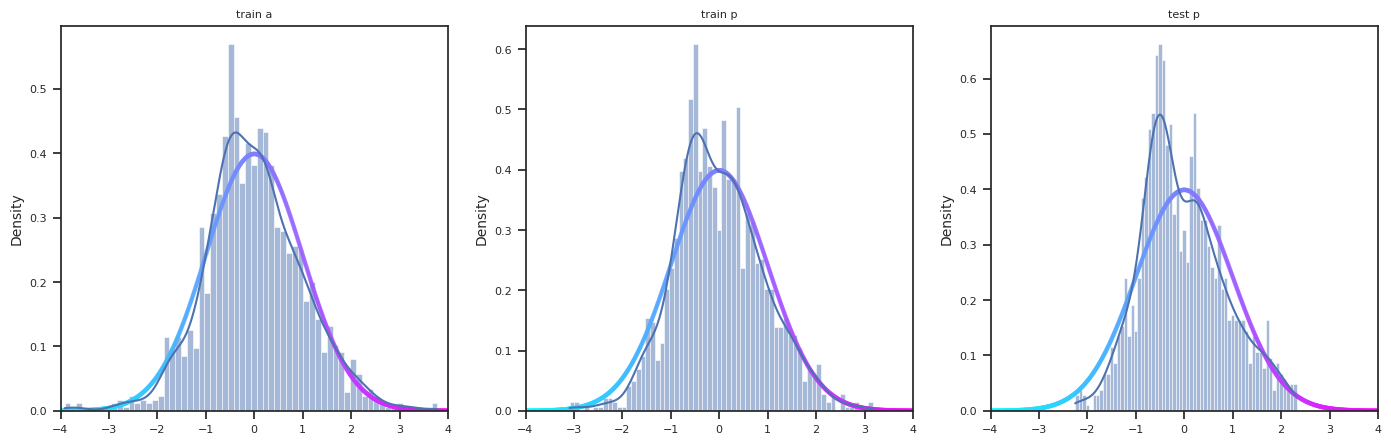

In [39]:
nx = np.linspace(-4,4,1001,True)
ny = scipy.stats.norm.pdf(nx)

plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.histplot(x=train_y, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train a")

plt.subplot(1,3,2)
sns.histplot(x=yp, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train p")

plt.subplot(1,3,3)
sns.histplot(x=test_y_pred, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("test p")

plt.show()